In [17]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt

In [50]:
# Load data
semantic_search = pd.read_csv('semantic_search.csv')
company_ratings = pd.read_csv('company_ratings.csv')

In [51]:
semantic_search['Extracted_Companies'].fillna('', inplace=True)
company_ratings['Company Name'].fillna('', inplace=True)

In [52]:
# Vektorisasi
vectorizer = TfidfVectorizer()
all_companies = pd.concat([semantic_search['Extracted_Companies'], company_ratings['Company Name']], ignore_index=True)
vectorizer.fit(all_companies)
semantic_vecs = vectorizer.transform(semantic_search['Extracted_Companies'])
company_vecs = vectorizer.transform(company_ratings['Company Name'])

In [53]:
# Hitung cosine similarity
similarity_matrix = cosine_similarity(semantic_vecs, company_vecs)

# Menetapkan threshold untuk kesesuaian
threshold = 0.5

In [54]:
# Pemetaan ke 'Company Name' yang paling serupa atau kosongkan jika di bawah threshold
semantic_search['semantic_validate'] = [
    company_ratings['Company Name'][sim.argmax()] if max(sim) >= threshold else ''
    for sim in similarity_matrix
]


In [55]:
# Menghitung jumlah total entri yang tidak kosong (termasuk duplikat)
total_non_empty = semantic_search[semantic_search['semantic_validate'] != ''].count()['semantic_validate']

# Menghitung jumlah entri unik yang tidak kosong
unique_non_empty = semantic_search[semantic_search['semantic_validate'] != ''].nunique()['semantic_validate']

print(f"Jumlah total perusahaan yang tidak kosong (termasuk duplikat): {total_non_empty}")
print(f"Jumlah unik perusahaan yang tidak kosong: {unique_non_empty}")

Jumlah total perusahaan yang tidak kosong (termasuk duplikat): 758
Jumlah unik perusahaan yang tidak kosong: 392


In [56]:
semantic_search.to_csv('validate_company_updated.csv',index=False)

In [4]:
data=pd.read_csv('validate_company_updated.csv')

In [5]:
data.head()

,Image URL,Timestamp,Filename,OCR_Text,Perusahaan tidak jelas atau tidak ada informasi valid (40%),"Deskripsi posisi, persyaratan, dan lokasi kerja yang tidak jelas (25%)",Deskripsi pekerjaan tidak spesifik (Jobdesc) (20%),Tidak ada proses wawancara dan seleksi yang jelas(5%),Ada permintaan biaya pendaftaran(5%),Gaji tidak realistis (5%),Total,Label,Extracted_Companies,semantic_validate
0,https://scontent-xsp2-1.cdninstagram.com/v/t51...,2022-12-28T07:12:37.000Z,2022-12-28_post_lokermagang0_image.jpg,UWFO MALANG SUGARNUTS INDONESIA PROGRAM MAGANG...,"0,00","0,25","0,20","0,00","0,00","0,00","0,45",Not Fraud,Sugarnutsco,NaN
1,https://scontent-xsp1-3.cdninstagram.com/v/t51...,2022-12-26T08:03:04.000Z,2022-12-26_post_lokermagang1_combined.jpg,WFO JAKARTA PSI PSI JAKARTA PROGRAM MAGANG PSI...,"0,00","0,00","0,20","0,00","0,00","0,00","0,20",Not Fraud,PSI,NaN
2,https://instagram.fsub8-2.fna.fbcdn.net/v/t51....,2022-12-26T05:05:33.000Z,2022-12-26_post_lokermagang2_combined.jpg,"WFH FULLTIME Asia Land YES, MUNGKIN INI BUAT K...","0,00","0,00","0,00","0,00","0,00","0,00","0,00",Not Fraud,Asia Land,PT Jakarta Land
3,https://instagram.fsub8-2.fna.fbcdn.net/v/t51....,2022-12-24T06:54:18.000Z,2022-12-24_post_lokermagang3_image.jpg,HYBRID SEMARANG hercodigital OPEN INTERNSHIBer...,"0,00","0,00","0,20","0,00","0,00","0,00","0,20",Not Fraud,Herco Digital Indonesia,PT Herco Digital Indonesia
4,https://instagram.fsub8-1.fna.fbcdn.net/v/t51....,2022-12-22T10:00:46.000Z,2022-12-22_post_lokermagang4_image.jpg,UWFH ONLINE KLTC Anude Jiraorshioifalieaia(iu ...,"0,00","0,00","0,00","0,00","0,00","0,00","0,00",Not Fraud,KLTC,NaN


In [9]:
# Function to convert a string to a float, handling commas and non-numeric characters
def convert_to_float(s):
    try:
        # Replace commas with periods and convert to float
        return float(str(s).replace(',', '.'))
    except ValueError:
        # Return None if conversion is not possible
        return None

In [10]:
# Columns to convert (5 to 11, considering 0-indexing)
columns_to_check = data.columns[4:11]

# Apply the conversion function to each of the specified columns
for col in columns_to_check:
    data[col] = data[col].apply(convert_to_float)

In [11]:
data.head()

,Image URL,Timestamp,Filename,OCR_Text,Perusahaan tidak jelas atau tidak ada informasi valid (40%),"Deskripsi posisi, persyaratan, dan lokasi kerja yang tidak jelas (25%)",Deskripsi pekerjaan tidak spesifik (Jobdesc) (20%),Tidak ada proses wawancara dan seleksi yang jelas(5%),Ada permintaan biaya pendaftaran(5%),Gaji tidak realistis (5%),Total,Label,Extracted_Companies,semantic_validate
0,https://scontent-xsp2-1.cdninstagram.com/v/t51...,2022-12-28T07:12:37.000Z,2022-12-28_post_lokermagang0_image.jpg,UWFO MALANG SUGARNUTS INDONESIA PROGRAM MAGANG...,0.0,0.25,0.2,0.0,0.0,0.0,0.45,Not Fraud,Sugarnutsco,NaN
1,https://scontent-xsp1-3.cdninstagram.com/v/t51...,2022-12-26T08:03:04.000Z,2022-12-26_post_lokermagang1_combined.jpg,WFO JAKARTA PSI PSI JAKARTA PROGRAM MAGANG PSI...,0.0,0.00,0.2,0.0,0.0,0.0,0.20,Not Fraud,PSI,NaN
2,https://instagram.fsub8-2.fna.fbcdn.net/v/t51....,2022-12-26T05:05:33.000Z,2022-12-26_post_lokermagang2_combined.jpg,"WFH FULLTIME Asia Land YES, MUNGKIN INI BUAT K...",0.0,0.00,0.0,0.0,0.0,0.0,0.00,Not Fraud,Asia Land,PT Jakarta Land
3,https://instagram.fsub8-2.fna.fbcdn.net/v/t51....,2022-12-24T06:54:18.000Z,2022-12-24_post_lokermagang3_image.jpg,HYBRID SEMARANG hercodigital OPEN INTERNSHIBer...,0.0,0.00,0.2,0.0,0.0,0.0,0.20,Not Fraud,Herco Digital Indonesia,PT Herco Digital Indonesia
4,https://instagram.fsub8-1.fna.fbcdn.net/v/t51....,2022-12-22T10:00:46.000Z,2022-12-22_post_lokermagang4_image.jpg,UWFH ONLINE KLTC Anude Jiraorshioifalieaia(iu ...,0.0,0.00,0.0,0.0,0.0,0.0,0.00,Not Fraud,KLTC,NaN


In [12]:
data.to_csv('validate_company_updated.csv',index=False)

In [13]:
for index, row in data.iterrows():
    # Check if the value in the specified column is 0.0
    if row['Perusahaan tidak jelas atau tidak ada informasi valid (40%)'] == 0.0:
        # Check if the 'semantic_validate' column has NaN value
        if pd.isna(row['semantic_validate']):
            # Update the value to 0.4
            data.at[index, 'Perusahaan tidak jelas atau tidak ada informasi valid (40%)'] = 0.4

# Displaying the first few rows of the dataset to verify the changes
data.head()

,Image URL,Timestamp,Filename,OCR_Text,Perusahaan tidak jelas atau tidak ada informasi valid (40%),"Deskripsi posisi, persyaratan, dan lokasi kerja yang tidak jelas (25%)",Deskripsi pekerjaan tidak spesifik (Jobdesc) (20%),Tidak ada proses wawancara dan seleksi yang jelas(5%),Ada permintaan biaya pendaftaran(5%),Gaji tidak realistis (5%),Total,Label,Extracted_Companies,semantic_validate
0,https://scontent-xsp2-1.cdninstagram.com/v/t51...,2022-12-28T07:12:37.000Z,2022-12-28_post_lokermagang0_image.jpg,UWFO MALANG SUGARNUTS INDONESIA PROGRAM MAGANG...,0.4,0.25,0.2,0.0,0.0,0.0,0.45,Not Fraud,Sugarnutsco,NaN
1,https://scontent-xsp1-3.cdninstagram.com/v/t51...,2022-12-26T08:03:04.000Z,2022-12-26_post_lokermagang1_combined.jpg,WFO JAKARTA PSI PSI JAKARTA PROGRAM MAGANG PSI...,0.4,0.00,0.2,0.0,0.0,0.0,0.20,Not Fraud,PSI,NaN
2,https://instagram.fsub8-2.fna.fbcdn.net/v/t51....,2022-12-26T05:05:33.000Z,2022-12-26_post_lokermagang2_combined.jpg,"WFH FULLTIME Asia Land YES, MUNGKIN INI BUAT K...",0.0,0.00,0.0,0.0,0.0,0.0,0.00,Not Fraud,Asia Land,PT Jakarta Land
3,https://instagram.fsub8-2.fna.fbcdn.net/v/t51....,2022-12-24T06:54:18.000Z,2022-12-24_post_lokermagang3_image.jpg,HYBRID SEMARANG hercodigital OPEN INTERNSHIBer...,0.0,0.00,0.2,0.0,0.0,0.0,0.20,Not Fraud,Herco Digital Indonesia,PT Herco Digital Indonesia
4,https://instagram.fsub8-1.fna.fbcdn.net/v/t51....,2022-12-22T10:00:46.000Z,2022-12-22_post_lokermagang4_image.jpg,UWFH ONLINE KLTC Anude Jiraorshioifalieaia(iu ...,0.4,0.00,0.0,0.0,0.0,0.0,0.00,Not Fraud,KLTC,NaN


In [14]:
data['Total'] = data[data.columns[4:10]].sum(axis=1)
data.head()

,Image URL,Timestamp,Filename,OCR_Text,Perusahaan tidak jelas atau tidak ada informasi valid (40%),"Deskripsi posisi, persyaratan, dan lokasi kerja yang tidak jelas (25%)",Deskripsi pekerjaan tidak spesifik (Jobdesc) (20%),Tidak ada proses wawancara dan seleksi yang jelas(5%),Ada permintaan biaya pendaftaran(5%),Gaji tidak realistis (5%),Total,Label,Extracted_Companies,semantic_validate
0,https://scontent-xsp2-1.cdninstagram.com/v/t51...,2022-12-28T07:12:37.000Z,2022-12-28_post_lokermagang0_image.jpg,UWFO MALANG SUGARNUTS INDONESIA PROGRAM MAGANG...,0.4,0.25,0.2,0.0,0.0,0.0,0.85,Not Fraud,Sugarnutsco,NaN
1,https://scontent-xsp1-3.cdninstagram.com/v/t51...,2022-12-26T08:03:04.000Z,2022-12-26_post_lokermagang1_combined.jpg,WFO JAKARTA PSI PSI JAKARTA PROGRAM MAGANG PSI...,0.4,0.00,0.2,0.0,0.0,0.0,0.60,Not Fraud,PSI,NaN
2,https://instagram.fsub8-2.fna.fbcdn.net/v/t51....,2022-12-26T05:05:33.000Z,2022-12-26_post_lokermagang2_combined.jpg,"WFH FULLTIME Asia Land YES, MUNGKIN INI BUAT K...",0.0,0.00,0.0,0.0,0.0,0.0,0.00,Not Fraud,Asia Land,PT Jakarta Land
3,https://instagram.fsub8-2.fna.fbcdn.net/v/t51....,2022-12-24T06:54:18.000Z,2022-12-24_post_lokermagang3_image.jpg,HYBRID SEMARANG hercodigital OPEN INTERNSHIBer...,0.0,0.00,0.2,0.0,0.0,0.0,0.20,Not Fraud,Herco Digital Indonesia,PT Herco Digital Indonesia
4,https://instagram.fsub8-1.fna.fbcdn.net/v/t51....,2022-12-22T10:00:46.000Z,2022-12-22_post_lokermagang4_image.jpg,UWFH ONLINE KLTC Anude Jiraorshioifalieaia(iu ...,0.4,0.00,0.0,0.0,0.0,0.0,0.40,Not Fraud,KLTC,NaN


In [15]:
data['Label'] = data['Total'].apply(lambda x: 'Fraud' if x > 0.7 else 'Not-Fraud')
data.head()

,Image URL,Timestamp,Filename,OCR_Text,Perusahaan tidak jelas atau tidak ada informasi valid (40%),"Deskripsi posisi, persyaratan, dan lokasi kerja yang tidak jelas (25%)",Deskripsi pekerjaan tidak spesifik (Jobdesc) (20%),Tidak ada proses wawancara dan seleksi yang jelas(5%),Ada permintaan biaya pendaftaran(5%),Gaji tidak realistis (5%),Total,Label,Extracted_Companies,semantic_validate
0,https://scontent-xsp2-1.cdninstagram.com/v/t51...,2022-12-28T07:12:37.000Z,2022-12-28_post_lokermagang0_image.jpg,UWFO MALANG SUGARNUTS INDONESIA PROGRAM MAGANG...,0.4,0.25,0.2,0.0,0.0,0.0,0.85,Fraud,Sugarnutsco,NaN
1,https://scontent-xsp1-3.cdninstagram.com/v/t51...,2022-12-26T08:03:04.000Z,2022-12-26_post_lokermagang1_combined.jpg,WFO JAKARTA PSI PSI JAKARTA PROGRAM MAGANG PSI...,0.4,0.00,0.2,0.0,0.0,0.0,0.60,Not-Fraud,PSI,NaN
2,https://instagram.fsub8-2.fna.fbcdn.net/v/t51....,2022-12-26T05:05:33.000Z,2022-12-26_post_lokermagang2_combined.jpg,"WFH FULLTIME Asia Land YES, MUNGKIN INI BUAT K...",0.0,0.00,0.0,0.0,0.0,0.0,0.00,Not-Fraud,Asia Land,PT Jakarta Land
3,https://instagram.fsub8-2.fna.fbcdn.net/v/t51....,2022-12-24T06:54:18.000Z,2022-12-24_post_lokermagang3_image.jpg,HYBRID SEMARANG hercodigital OPEN INTERNSHIBer...,0.0,0.00,0.2,0.0,0.0,0.0,0.20,Not-Fraud,Herco Digital Indonesia,PT Herco Digital Indonesia
4,https://instagram.fsub8-1.fna.fbcdn.net/v/t51....,2022-12-22T10:00:46.000Z,2022-12-22_post_lokermagang4_image.jpg,UWFH ONLINE KLTC Anude Jiraorshioifalieaia(iu ...,0.4,0.00,0.0,0.0,0.0,0.0,0.40,Not-Fraud,KLTC,NaN


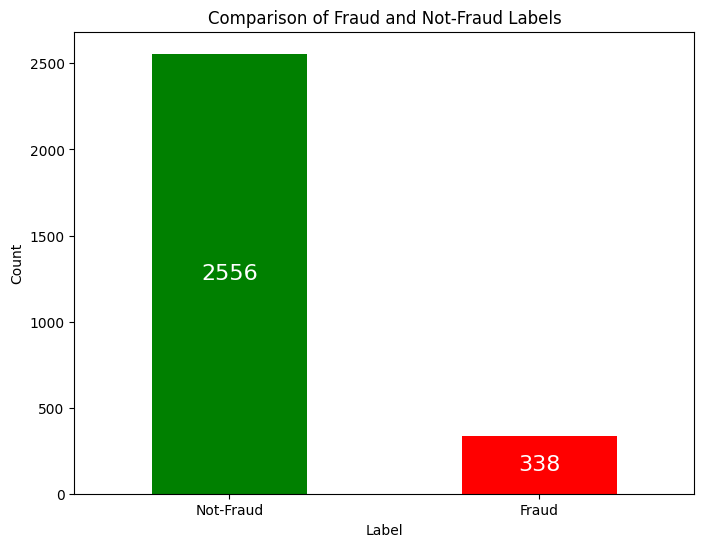

In [20]:
plt.figure(figsize=(8, 6))
ax = label_counts.plot(kind='bar', color=['green', 'red'])
plt.title('Comparison of Fraud and Not-Fraud Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=0)

# Adjusting the text for the exact counts with larger font size, positioned to avoid extending beyond the bars
for p in ax.patches:
    ax.annotate(str(p.get_height()), 
                (p.get_x() + p.get_width() / 2., p.get_height() / 2), 
                ha='center', va='center', 
                fontsize=16, color='white')

plt.show()

In [21]:
data.to_csv('Merged_data.csv',index=False)